# Air Quality in Madrid (2001-2018)

In [1]:
#important library
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
# loading all csv file names
files = glob.glob("csvs_per_year/*.csv")

In [3]:
# reading csv files
for index,file in enumerate(files):
    files[index] = pd.read_csv(file,index_col='date',parse_dates=['date'])

In [4]:
# merging all csv files
df = pd.concat(files)

In [5]:
station_df = pd.read_csv('stations.csv') 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808224 entries, 2001-08-01 01:00:00 to 2018-02-01 00:00:00
Data columns (total 18 columns):
 #   Column   Dtype  
---  ------   -----  
 0   BEN      float64
 1   CO       float64
 2   EBE      float64
 3   MXY      float64
 4   NMHC     float64
 5   NO_2     float64
 6   NOx      float64
 7   OXY      float64
 8   O_3      float64
 9   PM10     float64
 10  PXY      float64
 11  SO_2     float64
 12  TCH      float64
 13  TOL      float64
 14  station  int64  
 15  PM25     float64
 16  NO       float64
 17  CH4      float64
dtypes: float64(17), int64(1)
memory usage: 552.0 MB


The column names are:
* SO_2: sulphur dioxide level measured in μg/m³.
* CO: carbon monoxide level measured in mg/m³.
* NO: nitric oxide level measured in μg/m³.
* NO_2: nitrogen dioxide level measured in μg/m³.
* PM25: particles smaller than 2.5 μm level measured in μg/m³.
* PM10: particles smaller than 10 μm.
* NOx: nitrous oxides level measured in μg/m³.
* O_3: ozone level measured in μg/m³.
* TOL: toluene (methylbenzene) level measured in μg/m³.
* BEN: benzene level measured in μg/m³.
* EBE: ethylbenzene level measured in μg/m³.
* MXY: m-xylene level measured in μg/m³.
* PXY: p-xylene level measured in μg/m³.
* OXY: o-xylene level measured in μg/m³.
* TCH: total hydrocarbons level measured in mg/m³.
* CH4: methane level measured in mg/m³.
* NMHC: non-methane hydrocarbons (volatile organic compounds) level measured in mg/m³.
* Stations: Stations were the data was taken

In [7]:
df.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


### Handling NaN Values
Based off the `Handling_missing_values.ipynb` notebook. The following strategy will be used to handle our missing data;
1. Features with more than 72% missing data will be dropped. This is because the amount of known data points in these fearures is negligible compared to the amount of missing data. Imputing these values will lead to a huge bias in the data.
2. Missing values in other features will be replaced with their median values. This is to preserve the statistical property of each feature as much as possible. Median is used here instead of the mean because the mean can be affected by the presence of outliers.

In [8]:
#summing up missing values in the data set and saving it in 'missing_count'
missing_count = df.isnull().sum()
missing_count_df = pd.DataFrame(missing_count, columns=['missing_values'])
missing_count_df

,missing_values
BEN,2766540
CO,1157212
EBE,2806500
MXY,3492809
NMHC,2722912
NO_2,21174
NOx,1431949
OXY,3492529
O_3,816492
PM10,946969


In [9]:
#Presenting percentage of data points, missing in each feature
string_percentage = []
float_percentage =[]
for key,value in missing_count.items():
    percent_missing = round((value/3808224)*100,3)
    float_percentage.append(percent_missing)
    string_percentage.append(str(percent_missing)+'%')
missing_df = pd.DataFrame(index = missing_count.keys(), columns=['Percentage_missing'])
missing_df['Percentage_missing']= string_percentage
missing_df

,Percentage_missing
BEN,72.646%
CO,30.387%
EBE,73.696%
MXY,91.718%
NMHC,71.501%
NO_2,0.556%
NOx,37.601%
OXY,91.71%
O_3,21.44%
PM10,24.866%


In [10]:
#Removing features with more than 72% NAN entries
df_copy = df.copy()
missing_dict = dict(zip(missing_count.keys(),float_percentage))
for key,value in missing_dict.items():
    if value > 72:
        df_copy.drop(key,inplace=True, axis= 1)

df_copy_missing_dict = df_copy.isnull().sum()

#Replacing missing data in each column with the feature's median value and storing in a new variable 'clean_df'
clean_df = df_copy.copy()
for feature in df_copy_missing_dict.keys():
    clean_df[feature].fillna(clean_df[feature].median(),inplace=True)

#Checking to confirm if missing values have been addressed
clean_df.isnull().sum()
        

CO         0
NMHC       0
NO_2       0
NOx        0
O_3        0
PM10       0
SO_2       0
TCH        0
station    0
NO         0
dtype: int64

In [11]:
clean_df.head()

,CO,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,station,NO
date,,,,,,,,,,
2001-08-01 01:00:00,0.37,0.15,58.400002,87.150002,34.529999,105.000000,6.34,1.38,28079001,6.0
2001-08-01 01:00:00,0.34,0.07,56.250000,75.169998,42.160000,100.599998,8.11,1.24,28079035,6.0
2001-08-01 01:00:00,0.28,0.15,50.660000,61.380001,46.310001,100.099998,7.85,1.38,28079003,6.0
2001-08-01 01:00:00,0.47,0.15,69.790001,73.449997,40.650002,69.779999,6.46,1.38,28079004,6.0
2001-08-01 01:00:00,0.39,0.15,22.830000,24.799999,66.309998,75.180000,8.80,1.38,28079039,6.0


### Visualization of the station dataset

In [12]:
station_df.head()

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604


In [13]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24 non-null     int64  
 1   name       24 non-null     object 
 2   address    24 non-null     object 
 3   lon        24 non-null     float64
 4   lat        24 non-null     float64
 5   elevation  24 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ KB


<AxesSubplot:xlabel='elevation', ylabel='count'>

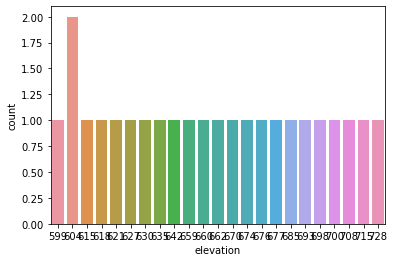

In [14]:
sns.countplot(x = station_df['elevation'])

<AxesSubplot:xlabel='lat'>

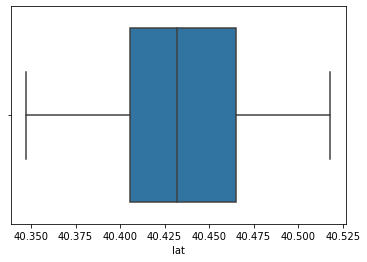

In [15]:
sns.boxplot(x = station_df['lat'])

<AxesSubplot:xlabel='lon'>

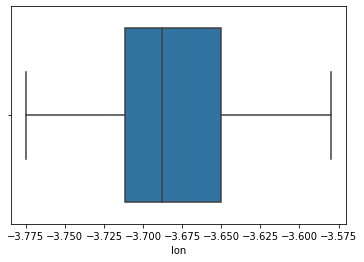

In [16]:
sns.boxplot(x = station_df['lon'])

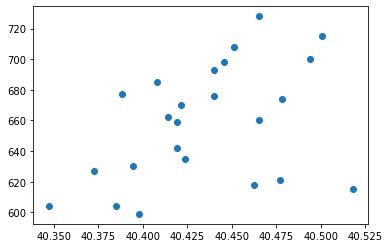

In [17]:
plt.scatter(station_df['lat'], station_df['elevation'])

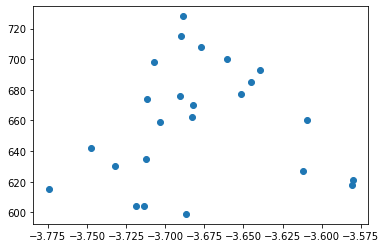

In [18]:
plt.scatter(station_df['lon'], station_df['elevation'])

There is a weak positive correlation between the latitude and the elevation(they tend to rise together) meaning that areas with high latitude can be characterized with air quality such as lower oxygen, strong winds, frigid temperatures etc

The above statement is also true for the longitude but the relationship between latitude and elevation is stronger than that of longitude and elevation.

###  Exploring the Cleaned DataFrame

In [19]:
clean_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,CO,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,station,NO
count,3808224.000000,3808224.000000,3808224.000000,3808224.000000,3808224.000000,3808224.000000,3808224.000000,3808224.000000,3808224.000000,3808224.000000
mean,0.504686,0.160655,50.435526,96.846830,38.761408,27.084849,9.976273,1.395942,28079029.315996,13.017251
std,0.452070,0.083902,34.460044,88.587864,27.015056,22.721270,7.866771,0.127100,20.285741,32.981529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28079001.000000,0.000000
25%,0.300000,0.150000,24.000000,60.060001,18.000000,14.570000,6.760000,1.380000,28079014.000000,6.000000
50%,0.400000,0.150000,44.000000,76.150002,34.860001,21.490000,8.150000,1.380000,28079024.000000,6.000000
75%,0.500000,0.150000,69.339996,95.889999,52.570000,31.000000,10.300000,1.380000,28079040.000000,6.000000
max,18.040001,9.070000,628.599976,2537.000000,236.000000,695.000000,199.100006,10.480000,28079099.000000,1146.000000


In [20]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808224 entries, 2001-08-01 01:00:00 to 2018-02-01 00:00:00
Data columns (total 10 columns):
 #   Column   Dtype  
---  ------   -----  
 0   CO       float64
 1   NMHC     float64
 2   NO_2     float64
 3   NOx      float64
 4   O_3      float64
 5   PM10     float64
 6   SO_2     float64
 7   TCH      float64
 8   station  int64  
 9   NO       float64
dtypes: float64(9), int64(1)
memory usage: 319.6 MB


The dataset is made up of 3,808,224 indexes and 10 columns

In [21]:
clean_df.nunique()

CO          1076
NMHC         300
NO_2       12460
NOx        19063
O_3        10860
PM10       11877
SO_2        9776
TCH          484
station       39
NO           818
dtype: int64

## Analyzing Relationships Between Variables

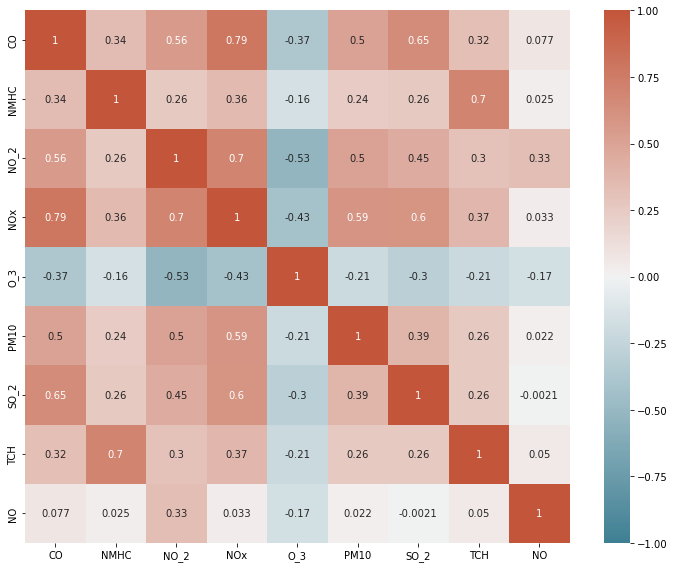

In [22]:
# Calculate the correlation matrix
corr = clean_df.loc[:, clean_df.columns!='station'].corr()

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr, vmin=-1, vmax=1,
                cmap=sns.diverging_palette(220,20,as_cmap=True),
                ax=ax, annot=True)
plt.tight_layout()
plt.show()

Question: How do these gases correlate? Any interpretation for this plot?

In [23]:
# creating copy for plotting
df.plot = clean_df.copy() 
# reseting index because the duplicate 'date' index threw an error while sampling the data
df.plot = df.plot.reset_index()
# We don't need the station and date columns in the plot
df.plot = df.plot.loc[:, ~df.plot.columns.isin(['station', 'date'])]
df.plot

,CO,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,NO
0,0.37,0.15,58.400002,87.150002,34.529999,105.000000,6.34,1.38,6.0
1,0.34,0.07,56.250000,75.169998,42.160000,100.599998,8.11,1.24,6.0
2,0.28,0.15,50.660000,61.380001,46.310001,100.099998,7.85,1.38,6.0
3,0.47,0.15,69.790001,73.449997,40.650002,69.779999,6.46,1.38,6.0
4,0.39,0.15,22.830000,24.799999,66.309998,75.180000,8.80,1.38,6.0
...,...,...,...,...,...,...,...,...,...
3808219,0.50,0.15,91.000000,192.000000,1.000000,35.000000,8.15,1.38,66.0
3808220,0.70,0.15,107.000000,241.000000,34.860001,29.000000,15.00,1.38,87.0
3808221,0.40,0.15,48.000000,91.000000,2.000000,21.490000,8.15,1.38,28.0
3808222,0.40,0.15,103.000000,320.000000,2.000000,21.490000,8.15,1.38,141.0


<function matplotlib.pyplot.show(close=None, block=None)>

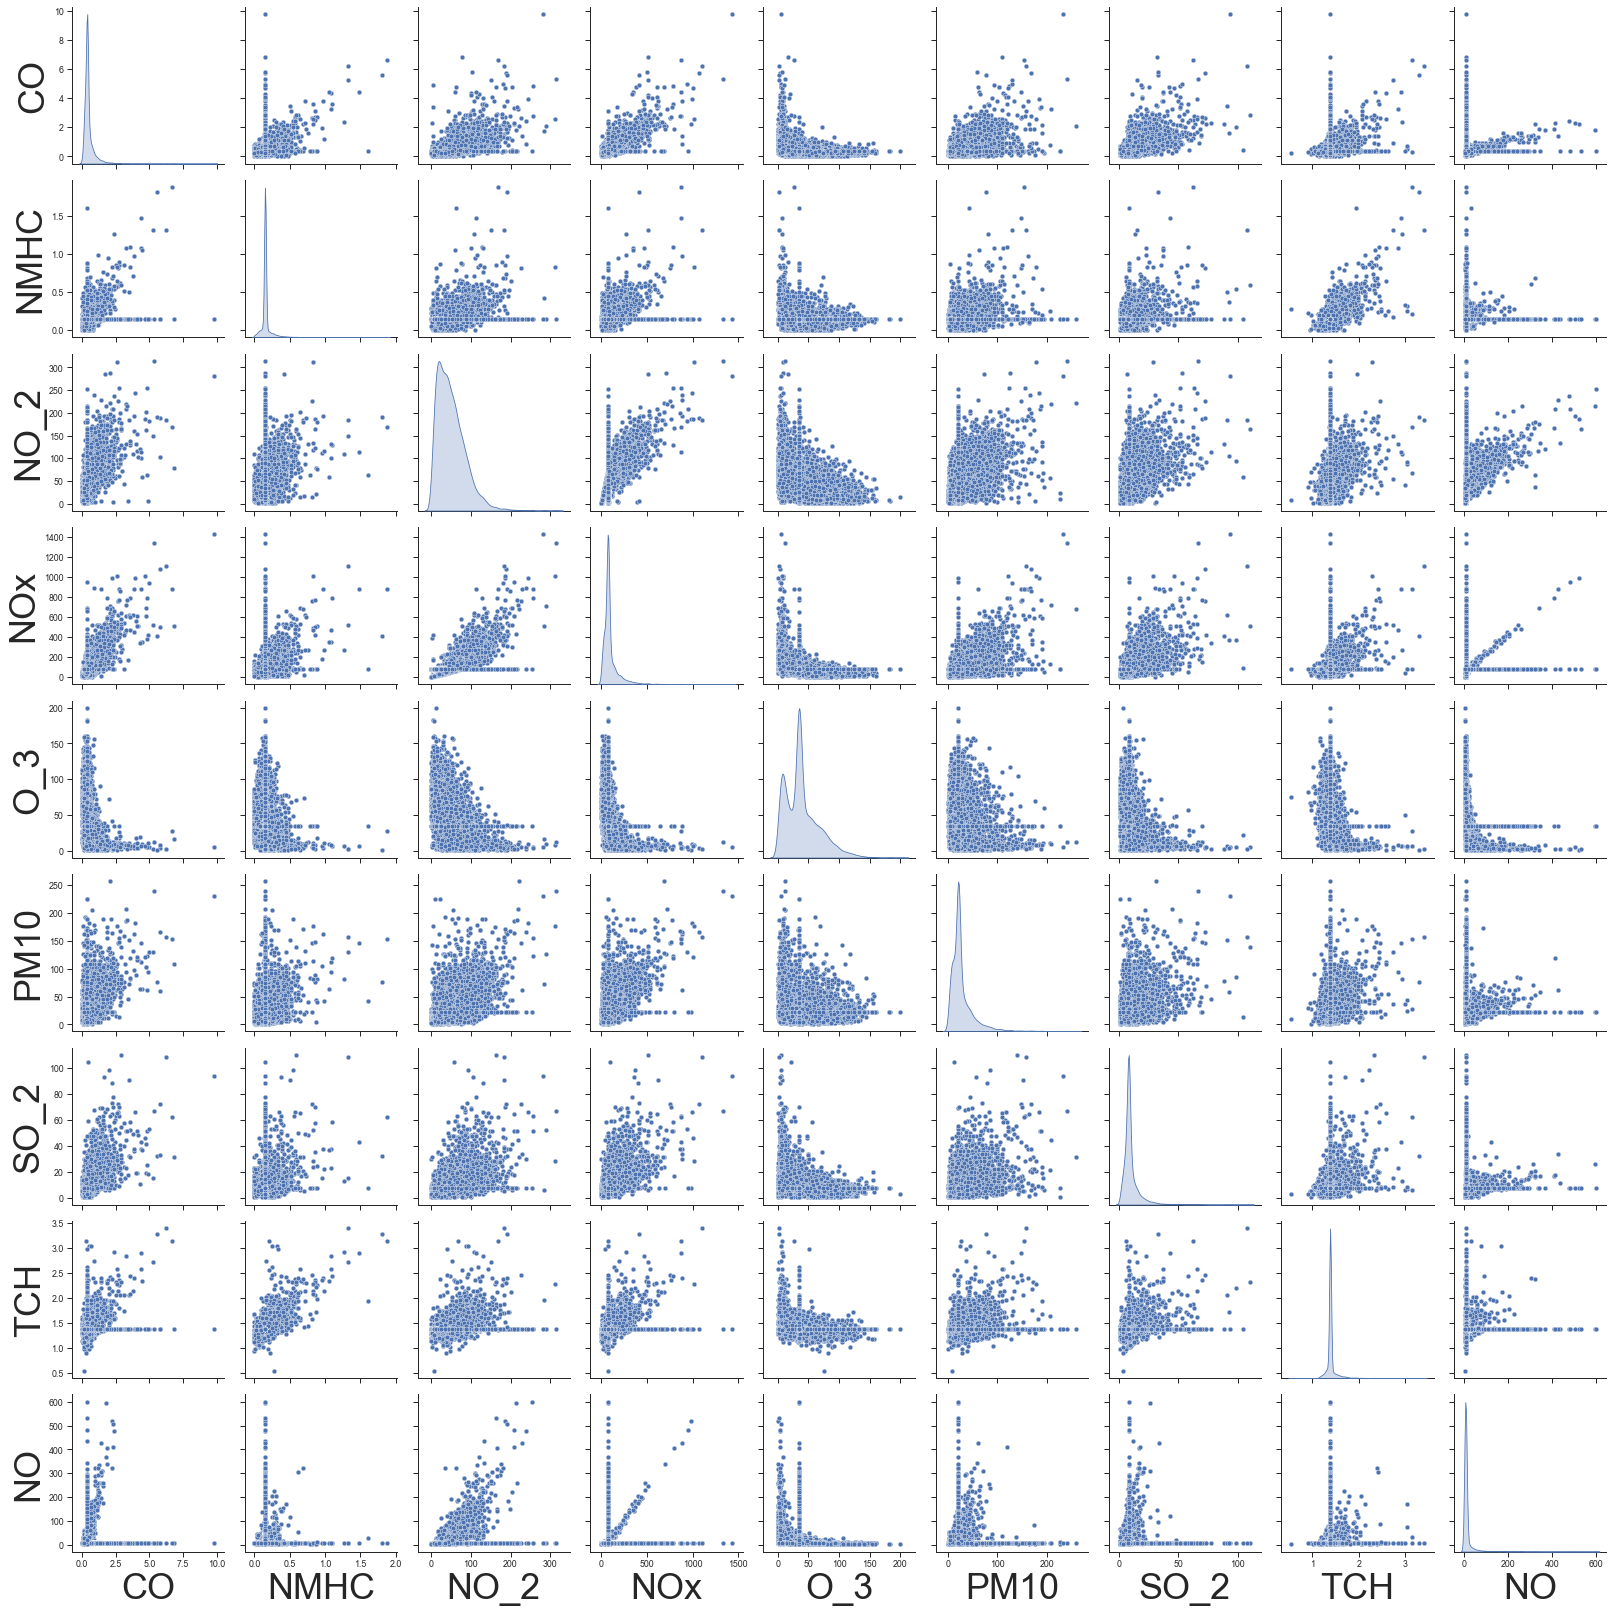

In [24]:
sns.set(style='ticks', color_codes=True)

sns.set_context("paper", rc={"axes.labelsize":36})
sns.pairplot(df.plot.sample(10000), diag_kind='kde')

plt.tight_layout()
plt.show

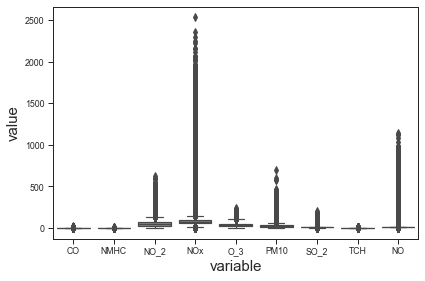

In [26]:
# I want to do a faceted plot by the predictor but I do not know which ias
sns.set_context("paper", rc={"axes.labelsize":15})

sns.boxplot(x='variable', y='value', data=pd.melt(df.plot))

plt.tight_layout()
plt.show()